In [188]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

In [189]:
file = 'I(s)_vs_s.txt'
folder = os.getcwd()
df = pd.read_csv(os.path.join(folder, file), sep = '\s+')
q = df['S(A^-1)'].to_numpy()
Iofs = df['Itot'].to_numpy()

In [190]:
#Necessary functions
def function_inside(q,I,r):
    return r*(q**2)*I*np.sin(np.multiply(q,r))
def bg1(q, I, a):
    return I*np.exp(-a*(q**2))

The I total vs q from the theoreticall data

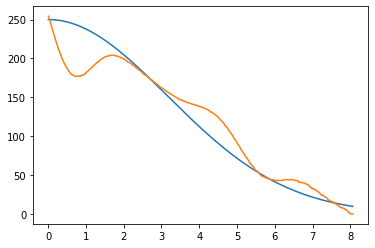

In [196]:
plt.plot(q, bg1(q, 250, 0.05))
plt.plot(q, Iofs)

$Q^2 * Itot$

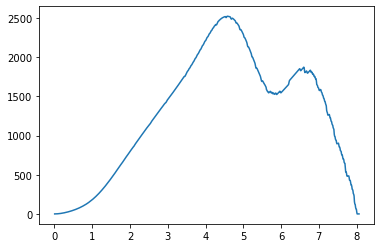

In [197]:
q2 = q**2
q2I = np.multiply(q2, Iofs)
plt.plot(q, q2I)

In [193]:
from sklearn import metrics

r = np.linspace(0,8, 100)
cpdf_r = []


for ri in r:
    y = function_inside(q, Iofs, ri)
    area = metrics.auc(q,function_inside(q, Iofs, ri))
    cpdf_r.append(area)

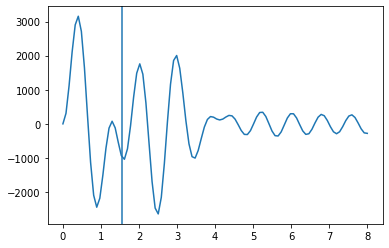

In [194]:
plt.plot(r, cpdf_r)
plt.axvline(1.54)